In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width: 100% !important; }</style>"))


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import scale, minmax_scale, robust_scale
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

In [3]:
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname="malgunbd.ttf", size=24)

In [ ]:
"""
02/21
분석계획 수립
-영향인자 탐지를 확인하기-확인할 목적으로 한다는 것을 보여주기
-목적은 목적: 
-"차이 확인"이라는 말은 별로
-관리도의 종류에 따라 달라지는 수준: 불량률이나 불량개수관련개면 시그마 수준이 아니다는 것을 알아야한다.
연속형 x바 기준일때 , c관리도:공정의 상태를 봄, 안정적? 불안정한지 확인하는 것,,, 설비의 상태가 안정적인가?
이상요인이 있나
-글씨기준 14포인트 이상으로 만들기
-이거가지고 돼?라는 생각: 
뭐에 대한 영향인자인지, (분석을 해가며 추가 해야겠습니다.)라고 생각할것,,, 
 -재고량을 분석하는건, 주문량의 판매별 추이를 보기... 판매량이 일정하다는 것? 증가
 -시계열 분석: 품목별로  평균성을 보기- 
"""

In [ ]:
"""
다음주에 관련된 것, 보고서를 염두해두고 작업하기-
전체 장수

1) 제목(고객분석기반'이라는 말은 당연...
    -분석하고자하는 방향성
2) 추진배경(1장)
    -목적성을 고치기
3) 현황및 개선기회(1~2)
4) 분석계획(1~2장)
5) 분석결과(2~4)
    -함축적으로 표현
6) 개선안(2~4)
    -구체화된 모습
7) 소감(1장)
    -차주의 결과 발표서는 이렇게 들어감... 제목을 한자 만들음... 이미지를 넣어주기...!
"""

"""오후
-그래프 분석 모두 해보기
-그걸 소통해서 insight 정리를 하고, 소통하고 작업한다... 

"""
"""다음주 월요일-오전 분석 발표
            -오후 코칭
        목요일-오전 코칭"""

"""

In [5]:
df_order_raw=pd.read_csv("/home/pirl/Downloads/7th_project1/log_order_sheet.csv", engine="python", encoding='utf-8-sig')
"""
df_order_raw.head()
"""

'\ndf_order_raw.head()\n'

In [9]:
#제품 데이터
df_product_raw=pd.read_csv("/home/pirl/Downloads/7th_project1/master_product_sheet.csv", engine="python", encoding='utf-8-sig')
df_member_raw=pd.read_csv("/home/pirl/Downloads/7th_project1/master_member_sheet.csv", engine='python', encoding='utf-8-sig')

In [11]:
#
nan_id = []
for i,nan in enumerate(pd.isnull(df_product_raw["제조사"])):
    if nan == True:
        nan_id.append(i+1)

df_product_raw[df_product_raw["#"]==nan_id[38]]

,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,판매가,품절여부,후기
56,57,패커스,과세,0,22200,다원 날콩가루 400g 20봉 (박스 상품),2111,사용안함,NaN,050 : 식자재\n026 : NEW,23400,정상,0


In [12]:
df_product_fill=pd.read_csv("/home/pirl/Downloads/7th_project1/master_product_sheet_fill.csv", engine="python", encoding="utf-8-sig")
df_product_fill[df_product_fill["#"]==nan_id[38]]

,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,판매가,품절여부,후기
56,57,패커스,과세,0,22200,다원 날콩가루 400g 20봉 (박스 상품),2111,사용안함,다원,050 : 식자재\n026 : NEW,23400,정상,0


In [ ]:
for i in range()
df_product_raw[df_product_raw["상품명(기본)"]]

In [12]:
df_product_fill[df_product_fill["제조사"]=="다원"]

,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,판매가,품절여부,후기
52,53,패커스,과세,0,20000,다원 혼합찹쌀가루 300g 25봉 (박스 상품),2115,사용안함,다원,050 : 식자재\n026 : NEW,21400,정상,0
53,54,패커스,과세,0,22200,다원 혼합감자전분 500g 20봉 (박스 상품),2114,사용안함,다원,050 : 식자재\n026 : NEW,23800,정상,0
54,55,패커스,과세,0,38000,다원 찹쌀가루(국산) 1kg 10봉 (박스 상품),2113,사용안함,다원,050 : 식자재\n026 : NEW,40000,정상,0
55,56,패커스,과세,0,27800,다원 볶음콩가루 400g 20봉 (박스 상품),2112,사용안함,다원,050 : 식자재\n026 : NEW\n061 : vol.4 Catalogue\n0...,29500,정상,0
56,57,패커스,과세,0,22200,다원 날콩가루 400g 20봉 (박스 상품),2111,사용안함,다원,050 : 식자재\n026 : NEW,23400,정상,0
59,60,패커스,과세,0,26500,다원 20곡미숫가루 1kg 10개 (박스 상품),2108,사용안함,다원,050 : 식자재\n026 : NEW\n061 : vol.4 Catalogue\n0...,27900,정상,0


In [13]:
#제품 데이터의 결측치를 제거하기
df_product_fill=pd.read_csv("/home/pirl/Downloads/7th_project1/master_product_sheet_fill.csv", engine="python", encoding='utf-8-sig')

In [14]:
df_product_fill.isnull().sum()

#          0
공급사        0
과세/면세      0
담기         0
매입가        0
상품명(기본)    0
상품코드       0
재입고알림      0
제조사        0
카테고리       0
판매가        0
품절여부       0
후기         0
dtype: int64

In [10]:
import pandas as pd
df_product_fill.to_csv("master_product_sheet_fill_nan.csv",mode='w')

In [109]:
a = df_product_fill["제조사"].unique()

In [120]:
np.sort(a,axis=0)

array(['(주)니드코', '(주)유니레버', 'M&F', '구산식품', '남양유지', '늘푸른', '다원', '다인컴즈',
       '다인푸드', '대천', '델라', '동서식품', '리고', '마산명산', '모닌', '미소크린', '베오베',
       '부건', '부천', '사자', '삼양', '샘표', '성진', '수입', '아그라나푸르트코리아', '안주마을',
       '얼음골', '에스앤에치식품', '영미산업', '오성푸드', '유안종합식품', '은진물산', '자체제작', '중찬명가',
       '천혜', '청솔', '카파아이엔티', '칸나멜라', '파낙스코리아', '하나에프앤드엘', '해농', '화성'],
      dtype=object)

In [118]:
df_product_raw["제조사"].unique()

array(['자체제작', '(주)니드코', nan, '은진물산', 'Y-MD-00739', 'Y-MD-00739★',
       'Y-MD-00748'], dtype=object)

In [16]:
df_product_raw_sort=pd.DataFrame()
df_product_raw_sort=df_product_raw.sort_values(by=["상품코드"])
df_product_raw_sort.iloc[266:276,]

,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,판매가,품절여부,후기
753,754,패커스,과세,0,77440,반찬용기 204-2 2칸 투명 800개 1set(2박스),1223,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,102680,정상,0
752,753,패커스,과세,3,77440,반찬용기 204-2 2칸 블랙 800개 1set(2박스),1224,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,102680,정상,0
751,752,패커스,과세,2,75680,반찬용기 204 1칸 투명 800개 1set(2박스),1225,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,101640,정상,9
750,751,패커스,과세,2,75680,반찬용기 204 1칸 블랙 800개 1set(2박스),1226,사용함,Y-MD-00748,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,101640,정상,5
749,750,패커스,과세,6,70400,반찬용기 203 1칸 투명 800개 1set(2박스),1227,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,93720,정상,4
748,749,패커스,과세,7,70400,반찬용기 203 1칸 블랙 800개 1set(2박스),1228,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,93720,정상,2
747,748,패커스,과세,2,59400,반찬용기 202-2 2칸 투명 1000개 1set(2박스),1229,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,79620,정상,0
746,747,패커스,과세,2,59400,반찬용기 202-2 2칸 블랙 1000개 1set(2박스),1230,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,79620,정상,1
745,746,패커스,과세,4,58300,반찬용기 202 1칸 투명 1000개 1set(2박스),1231,사용함,Y-MD-00739★,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,80070,정상,4
744,745,패커스,과세,4,58300,반찬용기 202 1칸 블랙 1000개 1set(2박스),1232,사용함,Y-MD-00739,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,80070,정상,7


In [17]:
df_product_del_star=pd.DataFrame()
df_product_del_star=df_product_fill.sort_values(by=["상품코드"])
df_product_del_star.iloc[266:276,]

,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,판매가,품절여부,후기
753,754,패커스,과세,0,77440,반찬용기 204-2 2칸 투명 800개 1set(2박스),1223,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,102680,정상,0
752,753,패커스,과세,3,77440,반찬용기 204-2 2칸 블랙 800개 1set(2박스),1224,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,102680,정상,0
751,752,패커스,과세,2,75680,반찬용기 204 1칸 투명 800개 1set(2박스),1225,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,101640,정상,9
750,751,패커스,과세,2,75680,반찬용기 204 1칸 블랙 800개 1set(2박스),1226,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,101640,정상,5
749,750,패커스,과세,6,70400,반찬용기 203 1칸 투명 800개 1set(2박스),1227,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,93720,정상,4
748,749,패커스,과세,7,70400,반찬용기 203 1칸 블랙 800개 1set(2박스),1228,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,93720,정상,2
747,748,패커스,과세,2,59400,반찬용기 202-2 2칸 투명 1000개 1set(2박스),1229,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,79620,정상,0
746,747,패커스,과세,2,59400,반찬용기 202-2 2칸 블랙 1000개 1set(2박스),1230,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,79620,정상,1
745,746,패커스,과세,4,58300,반찬용기 202 1칸 투명 1000개 1set(2박스),1231,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,80070,정상,4
744,745,패커스,과세,4,58300,반찬용기 202 1칸 블랙 1000개 1set(2박스),1232,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,80070,정상,7


In [14]:
#order_preprocessed : 주문년월 추가된 데이터
df_order_preprocessed=pd.read_csv("/home/pirl/Downloads/7th_project1/1/order/order_preprocess_sheet.csv", engine="python", encoding="utf-8-sig")
df_order_product_raw=pd.read_csv("/home/pirl/Downloads/7th_project1/1/order/order_product_sheet.csv", engine="python", encoding="utf-8-sig")

In [29]:
df_money_check =pd.DataFrame
df_money_check = df_order_product_preprocessed["상품구매금액"] - df_order_preprocessed["판매가"]*df_order_preproce["수량"]
a =[]
for x in range(len(df_order_product_raw["상품구매금액"])):
    if df_money_check[x]!=0:
        a.append(x)

NameError: name 'df_order_product_preprocessed' is not defined

In [30]:
df_money_check =pd.DataFrame
df_money_check = df_order_product_raw["상품구매금액"] - df_order_product_raw["판매가"]*df_order_product_raw["수량"]
a =[]
for x in range(len(df_order_product_raw["상품구매금액"])):
    if df_money_check[x]!=0:
        a.append(x)

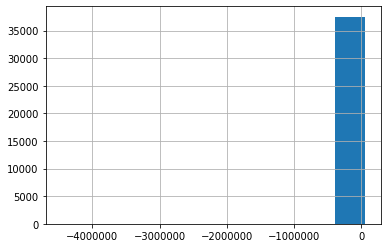

In [36]:
df_money_check.hist()

In [31]:
len(df_order_product_raw["상품구매금액"])

37511

In [32]:
print(len(a))

423


In [26]:
df_order_product_raw.describe()

,Unnamed: 0,Unnamed: 0.1,공급원가,네이버 포인트,사용한 적립금액,상품구매금액,상품번호,상품별 추가할인금액,수량,쿠폰 할인금액,판매가,품목번호
count,37511.000000,37511.000000,37511.000000,37511.000000,37511.000000,37511.000000,37511.000000,37511.000000,37511.000000,37511.000000,37511.000000,37511.000000
mean,21254.797926,21257.911999,48870.018794,97.229559,856.637413,85786.464237,736.065447,10731.192450,1.220975,251.043694,72345.381488,40378.452667
std,13719.355089,13724.968932,22830.382481,3328.300188,3750.755619,51680.054065,464.452757,12736.814948,0.755348,2097.313485,32100.493203,23185.305419
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,38.000000,0.000000,1.000000,0.000000,10.000000,4.000000
25%,9377.500000,9377.500000,37400.000000,0.000000,0.000000,58810.000000,379.000000,0.000000,1.000000,0.000000,57850.000000,20185.500000
50%,19284.000000,19284.000000,47850.000000,0.000000,0.000000,75820.000000,608.000000,10000.000000,1.000000,0.000000,71450.000000,40633.000000
75%,33066.500000,33066.500000,56100.000000,0.000000,0.000000,99400.000000,1126.000000,15800.000000,1.000000,0.000000,84810.000000,60699.500000
max,46660.000000,46748.000000,258500.000000,251600.000000,63579.000000,494555.000000,1681.000000,300000.000000,50.000000,59200.000000,485000.000000,79832.000000


In [18]:
#사은품에 해당되는 거 포함된 자료
df_order_preprocess_raw.describe()

,Unnamed: 0,Unnamed: 0.1,공급원가,네이버 포인트,사용한 적립금액,상품구매금액,상품번호,상품별 추가할인금액,수량,쿠폰 할인금액,판매가,품목번호
count,46661.000000,46661.000000,46661.000000,46661.000000,46661.000000,46661.000000,46661.000000,46661.000000,46661.000000,46661.000000,46661.000000,46661.000000
mean,23330.000000,23332.612803,40818.436274,78.163306,840.777887,68964.721288,763.193073,8626.856690,1.177643,247.673003,58159.370888,37149.499668
std,13470.014792,13474.413254,26446.690920,2984.420340,3684.940735,57508.036322,456.323734,12188.852681,0.682908,2014.308563,40662.143801,22384.193993
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,1.000000,0.000000,0.000000,4.000000
25%,11665.000000,11665.000000,23100.000000,0.000000,0.000000,32450.000000,378.000000,0.000000,1.000000,0.000000,30840.000000,18171.000000
50%,23330.000000,23330.000000,44000.000000,0.000000,0.000000,67800.000000,928.000000,2600.000000,1.000000,0.000000,63070.000000,35052.000000
75%,34995.000000,34995.000000,52800.000000,0.000000,0.000000,92380.000000,1209.000000,15000.000000,1.000000,0.000000,81000.000000,55964.000000
max,46660.000000,46748.000000,258500.000000,251600.000000,63579.000000,494555.000000,1681.000000,300000.000000,50.000000,59200.000000,485000.000000,79832.000000


In [70]:
df_order_preprocess_raw.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,...,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,주문년월
0,0,0,0,무통장입금,44550.0,교환안함,0.0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,...,전화주문 고객,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450.0,42602,1812
1,1,1,1,무통장입금,44000.0,교환안함,0.0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,...,일반,모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620.0,42930,1812
2,2,2,2,무통장입금,6820.0,교환안함,0.0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,...,비회원,모바일웹,20181230-0000100,2018-12-30 오후 3:15,unsinged_0,기타,0,13910.0,42998,1812
3,3,3,3,무통장입금,49500.0,교환안함,0.0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,...,일반,모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600.0,43063,1812
4,4,4,4,무통장입금,61600.0,교환안함,0.0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,...,사업자,모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710.0,43066,1812


In [37]:
df = df_order_preprocessed.groupby('주문년월').count()
df = df.reset_index()
df = df[['주문년월','판매가']]
df.columns = ['date','count']
index = df[df['date']==1906].index
df.drop(index)

,date,count
0,1701,4
1,1702,26
2,1703,42
3,1704,48
4,1705,85
5,1706,126
6,1707,172
7,1708,155
8,1709,167
9,1710,155


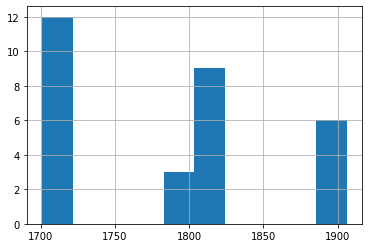

In [38]:
df["date"].hist()

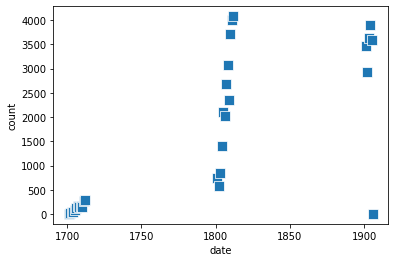

In [39]:

sns.scatterplot(x="date", y="count",data=df,s=100, marker='s')

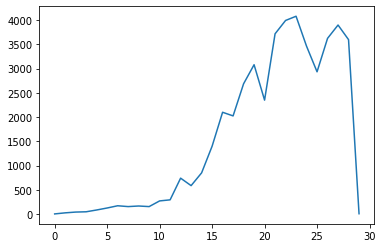

In [66]:
plt.plot(df["count"])
plt.show()
#월별 거래량/판매량/

In [134]:
df_order_preprocess_money = df_order_preprocessed.drop(["교환구분","카드사","주문자ID","주문일시","주문번호","주문경로","주문 시 회원등급","수령인 주소","상품명","배송완료일","배송시작일","배송번호","결제수단","배송비 정보"], axis='columns', inplace=False)
df_order_preprocess_money.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,공급원가,네이버 포인트,사용한 적립금액,상품구매금액,상품번호,상품별 추가할인금액,수량,쿠폰 할인금액,판매가,품목번호,주문년월
0,0,0,0,44550.0,0.0,0.0,71450.0,1077.0,13600.0,1,0,71450.0,42602,1812
1,1,1,1,44000.0,0.0,0.0,141240.0,42.0,19800.0,2,0,70620.0,42930,1812
2,2,2,2,6820.0,0.0,0.0,13910.0,1271.0,2900.0,1,0,13910.0,42998,1812
3,3,3,3,49500.0,0.0,0.0,81600.0,1085.0,12630.0,1,0,81600.0,43063,1812
4,4,4,4,61600.0,0.0,0.0,94710.0,1106.0,18000.0,1,0,94710.0,43066,1812


In [135]:
df_order_preprocess_money["주문년월"].unique()

array([1812, 1901, 1902, 1903, 1904, 1905, 1906, 1712, 1801, 1802, 1803,
       1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1701, 1702, 1703,
       1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711])

In [15]:
df_member_raw=pd.read_csv("/home/pirl/Downloads/7th_project1/master_member_sheet.csv", engine='python', encoding='utf-8-sig')

In [146]:
df_member_raw.head()

,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분
0,sr7577,45,0,남자,경기도 평택시 현신3길 76 (용이동),2016-12-30 오후 5:57,NaN,블로그광고,PC,2016-12-30,개인,일반
1,cgh1385,53,0,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반
2,pjkl77,28,0,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자
3,aabb8482,44,0,여자,충청남도 아산시 용화고길 46 (용화동),2017-01-23 오후 6:25,NaN,블로그광고,PC,2017-01-17,사업자,사업자
4,bear011,40,21908,남자,경기도 부천시 원미구 상일로 126 (상동),2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자,사업자


In [149]:
df_member_raw.describe()

,나이,사용가능 적립금
count,6575.000000,6575.000000
mean,40.921977,1808.583422
std,8.184024,4161.029062
min,21.000000,-1790.000000
25%,33.000000,0.000000
50%,44.000000,1000.000000
75%,47.000000,1800.000000
max,92.000000,125490.000000


In [17]:
df_product_category = pd.read_csv("/home/pirl/Downloads/product_category_sheet.csv", engine="python", encoding="utf-8-sig")

FileNotFoundError: [Errno 2] No such file or directory: '/home/pirl/Downloads/product_category_sheet.csv'

In [167]:
df_product_category.head()

,Unnamed: 0,Unnamed: 0.1,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,reg_카테고리,대분류,판매가,품절여부,후기
0,0,0,패커스,과세,0,55440,"실링용기 71호 백색 2,200ml 400개 1박스",2184,사용함,자체제작,018 : 실링용기\n018002 : 실링용기 > 2319(2318)시리즈\n042...,2319(2318)시리즈 실링용기 실링제품,실링제품,77480,정상,0
1,1,1,(주)니드코,과세,0,3080,"니드코]국산제품 정식쟁반,병원식판,분식점 돈까스쟁반 업소용 화이트 항균아트쟁반 5호",2181,사용안함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,소모품 주방용품 쟁반,주방용품,4950,정상,0
2,2,2,(주)니드코,과세,10,1120,"니드코]QueenRose 장미 밥공기그릇 /중국집,주방,식당,가정용 깨지지 않는 단...",2180,사용함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,소모품 주방용품 식기,주방용품,1800,정상,0
3,3,3,(주)니드코,과세,0,5600,니드코 터치미 종이컵디스펜서(자석형) 종이컵보관함,2179,사용안함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,소모품 주방용품 주방잡화,주방용품,9000,정상,0
4,4,4,(주)니드코,과세,0,42000,니드코 뉴카멜리아 사각수저함(수저통),2178,사용안함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,소모품 주방용품,주방용품,65000,정상,0


In [40]:
df_member_raw["나이"].unique()

array([45, 53, 28, 44, 40, 62, 47, 60, 34, 46, 54, 33, 35, 61, 69, 48, 38,
       29, 43, 37, 36, 41, 52, 39, 58, 42, 51, 32, 31, 56, 50, 55, 75, 26,
       27, 59, 68, 22, 49, 25, 23, 30, 63, 57, 24, 92, 67, 21, 65, 87, 72,
       74, 71, 89, 66, 91, 73, 70, 79, 77, 78, 64, 80, 90, 81, 76])

In [44]:
b= df_member_raw["나이"].sort_values()

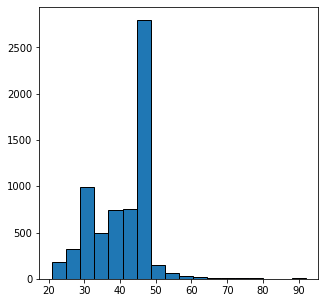

In [66]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.hist(df_member_raw["나이"], edgecolor="black",bins=18)
plt.show()

In [58]:
df_member_raw.columns
#외국인 

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분'],
      dtype='object')

In [55]:
a=[]
for x in range(len(df_member_raw)):
    if df_member_raw["사업자구분"][x] =="외국인":
        a.append(x)
print("사업자구분에서 외국인인 사람")
print(len(a))

print("==========member수정==========")

사업자구분에서 외국인인 사람
2
==========member수정==========


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

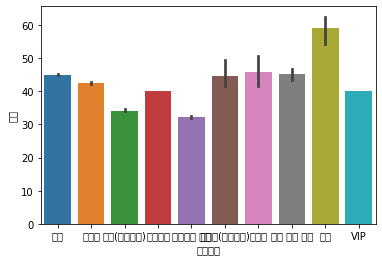

In [57]:
sns.barplot(data=df_member_raw, x="회원구분", y="나이")
plt.show()

array(['전화주문 고객', '일반', '비회원', '사업자', '특별회원', '딜러 유치 회원', '관리자', 'VIP',
       '딜러'], dtype=object)

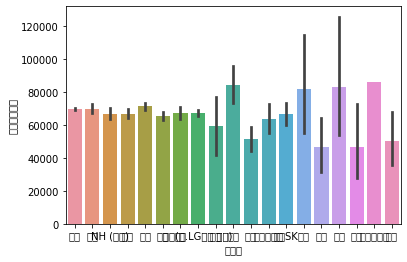

In [186]:
sns.barplot(data=df_order_preprocessed,x='카드사',y='상품구매금액')
plt.show()

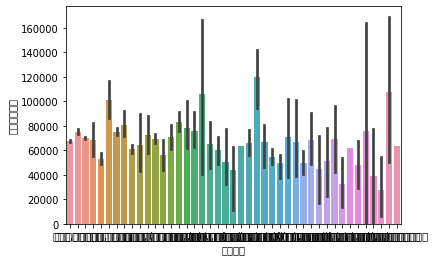

In [187]:
sns.barplot(data=df_order_preprocessed,x='결제수단',y='상품구매금액')
plt.show()

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49660 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

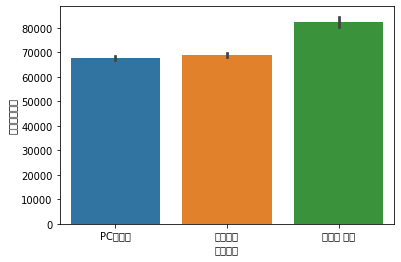

'\nsns.barplot(data=df_member_raw, x="회원구분", y="나이")\nplt.show()\n'

In [177]:
sns.barplot(data=df_order_preprocess_raw,x='주문경로',y='상품구매금액')
plt.show()

"""
sns.barplot(data=df_member_raw, x="회원구분", y="나이")
plt.show()
"""

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

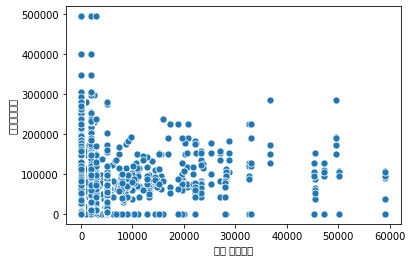

In [60]:
sns.scatterplot(x="쿠폰 할인금액", y="상품구매금액",data=df_order_preprocessed,s=50)

In [184]:
df_order_preprocessed.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,...,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,주문년월
0,0,0,0,무통장입금,44550.0,교환안함,0.0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,...,전화주문 고객,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450.0,42602,1812
1,1,1,1,무통장입금,44000.0,교환안함,0.0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,...,일반,모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620.0,42930,1812
2,2,2,2,무통장입금,6820.0,교환안함,0.0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,...,비회원,모바일웹,20181230-0000100,2018-12-30 오후 3:15,unsinged_0,기타,0,13910.0,42998,1812
3,3,3,3,무통장입금,49500.0,교환안함,0.0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,...,일반,모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600.0,43063,1812
4,4,4,4,무통장입금,61600.0,교환안함,0.0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,...,사업자,모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710.0,43066,1812


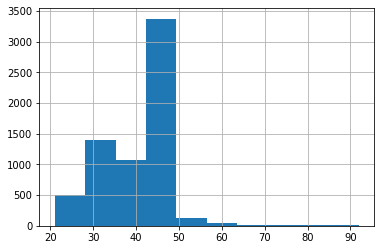

In [148]:
df_order_preprocess_raw["교환구분"]

<function matplotlib.pyplot.show(*args, **kw)>

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeW

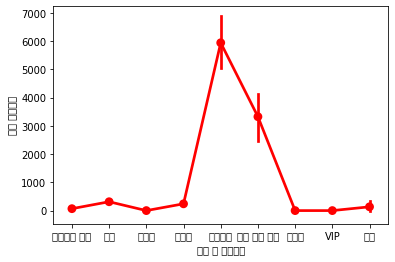

In [64]:
sns.pointplot(x="주문 시 회원등급",y="쿠폰 할인금액", data=df_order_preprocessed, color="r")
plt.show

,Unnamed: 0,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,구매여부
0,0,cgh1385,53,0,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반,구매
1,1,pjkl77,28,0,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자,구매
2,2,bear011,40,21908,남자,경기도 부천시 원미구 상일로 126 (상동),2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자,사업자,구매
3,3,kim0750,44,0,남자,경상북도 구미시 송동로7길 31-3 (도량동),2017-01-18 오후 4:28,2017-01-18 오후 4:41,SNS광고,PC,2017-01-18,사업자,사업자,구매
4,4,nonane9979,45,0,남자,부산광역시 금정구 중앙대로 1607 (부곡동),2017-02-13 오후 2:54,2017-02-13 오후 3:12,블로그광고,PC,2017-01-18,사업자,사업자,구매


In [79]:
df_order_preprocessed.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,...,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,주문년월
0,0,0,0,무통장입금,44550.0,교환안함,0.0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,...,전화주문 고객,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450.0,42602,1812
1,1,1,1,무통장입금,44000.0,교환안함,0.0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,...,일반,모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620.0,42930,1812
2,2,2,2,무통장입금,6820.0,교환안함,0.0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,...,비회원,모바일웹,20181230-0000100,2018-12-30 오후 3:15,unsinged_0,기타,0,13910.0,42998,1812
3,3,3,3,무통장입금,49500.0,교환안함,0.0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,...,일반,모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600.0,43063,1812
4,4,4,4,무통장입금,61600.0,교환안함,0.0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,...,사업자,모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710.0,43066,1812


In [96]:
df_order_preprocessed["제품별 수익"] =df_order_preprocessed["상품구매금액"] - df_order_preprocessed["상품별 추가할인금액"] - df_order_preprocessed["판매가"]*df_order_preprocessed["수량"]

In [98]:
df_order_preprocessed["제품별 수익"].describe()

count    4.666100e+04
mean    -9.034408e+03
std      3.208527e+04
min     -4.768845e+06
25%     -1.500000e+04
50%     -2.600000e+03
75%      0.000000e+00
max      5.010000e+04
Name: 제품별 수익, dtype: float64

In [91]:
df_order_preprocessed["결제수단"].unique()
"""
무통
적립
카드
휴대폰
가상계좌
쿠폰
예치금
페이나우
실시간계좌이체
페이나우(카드)
카카오페이(머니
카카오페이)카카오머니
에스크로

array(['무통장입금', '적립금,무통장입금', '카드', '적립금', '휴대폰', '적립금,가상계좌', '적립금,카드',
       '가상계좌', '쿠폰,카드', '예치금', '예치금,적립금,무통장입금', '쿠폰,무통장입금',
       '페이나우(실시간 계좌이체)', '예치금,무통장입금', '실시간계좌이체', '페이나우(카드)', '카드,무통장입금',
       '예치금,쿠폰,무통장입금', '예치금,카드', '카카오페이(카드)', '카카오페이(카카오머니)',
       '적립금,카카오페이(카카오머니)', '쿠폰,예치금', '적립금,카카오페이(카드)', '쿠폰,가상계좌',
       '적립금,페이나우(카드)', '적립금,카드,무통장입금', '적립금,페이나우(실시간 계좌이체)', '예치금,적립금,카드',
       '에스크로(실시간계좌이체)', '쿠폰,휴대폰', '적립금,휴대폰', '쿠폰,페이나우(카드)',
       '쿠폰,에스크로(실시간계좌이체)', '쿠폰,카드,무통장입금', '무통장입금,휴대폰', '페이나우(카드),무통장입금',
       '쿠폰,카카오페이(카드)', '예치금,쿠폰,카드', '무통장입금,실시간계좌이체', '예치금,휴대폰',
       '적립금,실시간계좌이체', '예치금,실시간계좌이체'], dtype=object)

In [ ]:
a = 0
for x in range(len(df_order_preprocessed)):
    len()

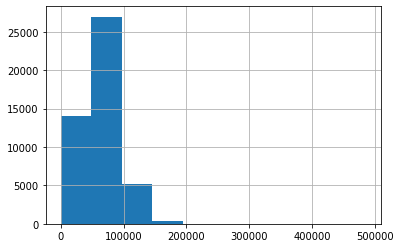

In [90]:
df_order_preprocessed["판매가"].hist()

In [88]:
df_order_preprocessed["주문경로"].unique()
#네이버 페이-네이버 포인트 쓴거를 확인=결제금액-=네이버 페이로 주문하는 쪽을 확대해야할 필요가 있음
df_order_group_order_way = pd.DataFrame()
df_order_group_order_way = df_order_preprocessed[df_order_preprocessed["주문경로"]=="네이버 페이"]

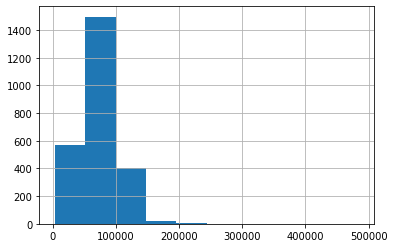

In [89]:
df_order_group_order_way["판매가"].hist()

plt.show()

In [99]:
df_order_preprocessed["주문경로"].unique()

array(['PC쇼핑몰', '모바일웹', '네이버 페이'], dtype=object)

In [ ]:
df_order_preprocessed[""] 

In [103]:
print(len(df_order_preprocessed[df_order_preprocessed["주문경로"]=="PC쇼핑몰"]))
print(len(df_order_preprocessed[df_order_preprocessed["주문경로"]=="모바일웹"]))
print(len(df_order_preprocessed[df_order_preprocessed["주문경로"]=="네이버 페이"]))

25649
18517
2495


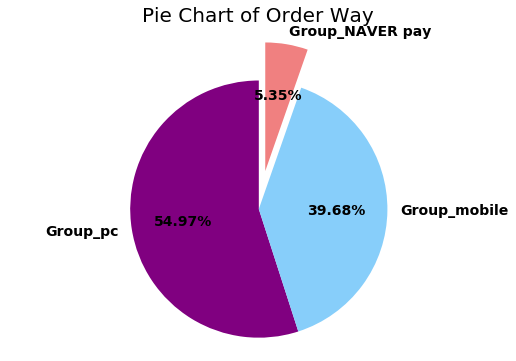

In [97]:
plt.rcParams['figure.figsize'] = [9, 6]

# information of groups

group_names = ['Group_pc', 'Group_mobile','Group_NAVER pay']
group_sizes = [25649, 18517, 2495]
group_colors = ["purple",'lightskyblue', 'lightcoral']
group_explodes = (0, 0, 0.3) # explode 1st slice

plt.pie(group_sizes,explode=group_explodes,labels=group_names, colors=group_colors, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14}) 
plt.axis('equal') #  equal length of X and Y axis
plt.title('Pie Chart of Order Way', fontsize=20)
plt.show()


In [18]:
df_order_client_quart_sort = pd.read_csv("/home/pirl/Downloads/7th_project1/1/order1/order_preprocess_sheet.csv", engine="python", encoding="utf-8-sig")


In [121]:
df_order_client_quart_sort["주문년월"].unique()

array([1812, 1901, 1902, 1903, 1904, 1905, 1906, 1712, 1801, 1802, 1803,
       1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1701, 1702, 1703,
       1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711])

In [157]:
print(len(df_order_client_quart_2017_1st)+len(df_order_client_quart_2017_2nd)+len(df_order_client_quart_2017_3rd)+len(df_order_client_quart_2017_4th))

1546


In [145]:
df_order_client_quart_2017_1st =df_order_client_quart_sort[(df_order_client_quart_sort["주문년월"]==1701)|(df_order_client_quart_sort["주문년월"]==1702)|(df_order_client_quart_sort["주문년월"]==1703)]
df_order_client_quart_2017_2nd =df_order_client_quart_sort[(df_order_client_quart_sort["주문년월"]==1704)|(df_order_client_quart_sort["주문년월"]==1705)|(df_order_client_quart_sort["주문년월"]==1706)]
df_order_client_quart_2017_3rd =df_order_client_quart_sort[(df_order_client_quart_sort["주문년월"]==1707)|(df_order_client_quart_sort["주문년월"]==1708)|(df_order_client_quart_sort["주문년월"]==1709)]
df_order_client_quart_2017_4th =df_order_client_quart_sort[(df_order_client_quart_sort["주문년월"]==1710)|(df_order_client_quart_sort["주문년월"]==1711)|(df_order_client_quart_sort["주문년월"]==1712)]

In [156]:
df_order_client_quart_2018_1st =df_order_client_quart_sort[(df_order_client_quart_sort["주문년월"]==1801)|(df_order_client_quart_sort["주문년월"]==1802)|(df_order_client_quart_sort["주문년월"]==1803)]
df_order_client_quart_2018_2nd =df_order_client_quart_sort[(df_order_client_quart_sort["주문년월"]==1804)|(df_order_client_quart_sort["주문년월"]==1805)|(df_order_client_quart_sort["주문년월"]==1806)]
df_order_client_quart_2018_3rd =df_order_client_quart_sort[(df_order_client_quart_sort["주문년월"]==1807)|(df_order_client_quart_sort["주문년월"]==1808)|(df_order_client_quart_sort["주문년월"]==1809)]
df_order_client_quart_2018_4th =df_order_client_quart_sort[(df_order_client_quart_sort["주문년월"]==1810)|(df_order_client_quart_sort["주문년월"]==1811)|(df_order_client_quart_sort["주문년월"]==1812)]
print(len(df_order_client_quart_2018_1st))
print(len(df_order_client_quart_2018_2nd))
print(len(df_order_client_quart_2018_3rd))
print(len(df_order_client_quart_2018_4th))
print(len(df_order_client_quart_2018_1st)+len(df_order_client_quart_2018_2nd)+len(df_order_client_quart_2018_3rd)+len(df_order_client_quart_2018_4th))

2178
5522
8114
11785
27599


In [158]:
df_order_client_quart_2019_1st =df_order_client_quart_sort[(df_order_client_quart_sort["주문년월"]==1901)|(df_order_client_quart_sort["주문년월"]==1902)|(df_order_client_quart_sort["주문년월"]==1903)]
df_order_client_quart_2019_2nd =df_order_client_quart_sort[(df_order_client_quart_sort["주문년월"]==1904)|(df_order_client_quart_sort["주문년월"]==1905)|(df_order_client_quart_sort["주문년월"]==1906)]

print(len(df_order_client_quart_2019_1st))
print(len(df_order_client_quart_2019_2nd))

print(len(df_order_client_quart_2019_1st)+len(df_order_client_quart_2019_2nd))

10015
7501
17516


In [174]:
 # info. of groups

group_names = ['2017', '2018', '2019']
group_sizes = [1546, 27599, 17516]

# info. of subgroups
subgroup_names = ['A_1', 'A_2', 'A_3', 'A_4', 'B_1', 'B_2', 'B_3','B_4','C_1', 'C_2']
subgroup_sizes = [len(df_order_client_quart_2017_1st), len(df_order_client_quart_2017_2nd), len(df_order_client_quart_2017_3rd),len(df_order_client_quart_2017_4th), len(df_order_client_quart_2018_1st),len(df_order_client_quart_2018_2nd), len(df_order_client_quart_2018_3rd), len(df_order_client_quart_2018_4th),len(df_order_client_quart_2019_1st),len(df_order_client_quart_2019_2nd)]
# colors
a, b, c = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]
# width
width_num = 0.4

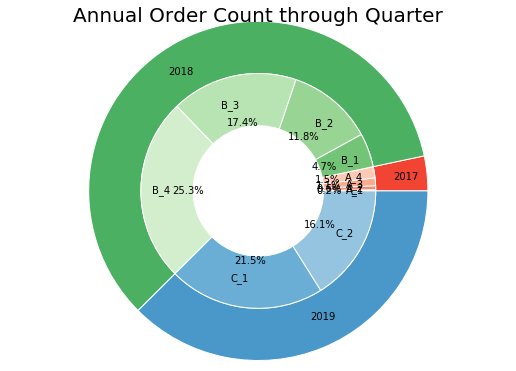

In [175]:
# Outside Ring
fig, ax = plt.subplots()
ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes,  radius=1.3, labels=group_names, labeldistance=0.8,colors=[a(0.6), b(0.6), c(0.6)])
plt.setp(pie_outside,width=width_num,edgecolor='white')

# Inside Ring
pie_inside, plt_labels, junk = ax.pie(subgroup_sizes, radius=(1.3 - width_num), labels=subgroup_names, labeldistance=0.75, autopct='%1.1f%%', colors=[a(0.5), a(0.4), a(0.3), a(0.2), b(0.5), b(0.4), b(0.3),b(0.2), c(0.5), c(0.4)])
plt.setp(pie_inside, width=width_num, edgecolor='white')
plt.title('Annual Order Count through Quarter', fontsize=20)
plt.show()

In [ ]:
plt.pie(df_age['빈도'],labels = df_age['나이'], shadow=True, startangle=90)
plt.show()

TypeError: object of type 'float' has no len()

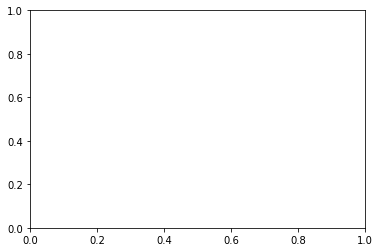

In [138]:

plt.plot(df_order_preprocess_money["주문년월"],df_order_preprocess_money["상품구매금액"].mean(), data=df_order_preprocess_money)

In [111]:
df_order_preprocess_money["매출이익"]= df_order_preprocess_money["상품구매금액"] -df_order_preprocess_money["사용한 적립금액"] - df_order_preprocess_money["네이버 포인트"] - df_order_preprocess_money["상품별 추가할인금액"] -df_order_preprocess_money["쿠폰 할인금액"]
df_order_preprocess_money["순이익"]= df_order_preprocess_money["상품구매금액"] -df_order_preprocess_money["사용한 적립금액"] - df_order_preprocess_money["네이버 포인트"] - df_order_preprocess_money["상품별 추가할인금액"] -df_order_preprocess_money["쿠폰 할인금액"] -df_order_preprocess_money["공급원가"]

<function matplotlib.pyplot.show(*args, **kw)>

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)


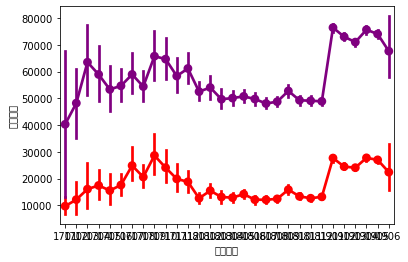

In [116]:
sns.pointplot(x="주문년월",y="순이익", data=df_order_preprocess_money, color="r")
sns.pointplot(x="주문년월",y = "매출이익", data=df_order_preprocess_money, color="purple")
plt.show

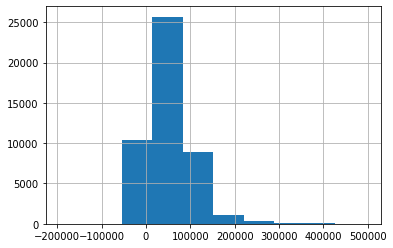

In [127]:
df_order_preprocess_money["매출이익"].hist()

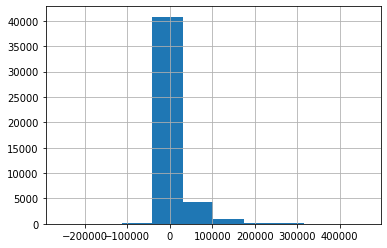

In [124]:
df_order_preprocess_money["순이익"].hist()

TypeError: 'int' object is not callable

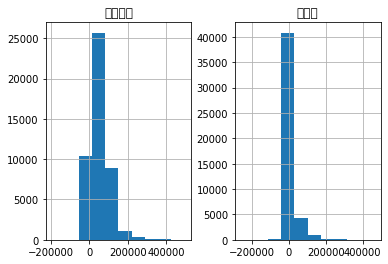

In [129]:
df_order_preprocess_groupby_total = df_order_preprocess_money.hist(["순이익","매출이익"]).size()
df_order_preprocess_groupby_total.plot.bar()

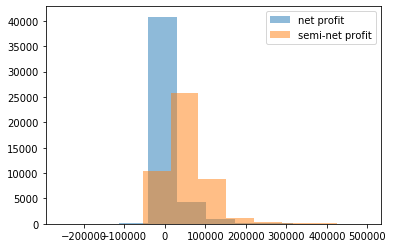

In [131]:
plt.hist(df_order_preprocess_money["순이익"],label="net profit",alpha=0.5, bins = 10)
plt.hist(df_order_preprocess_money["매출이익"],label="semi-net profit",alpha=0.5, bins = 10)
plt.legend()

In [121]:
import re
p = re.compile("18")
#df_order_re_18 = pd.DataFrame
#df_order_re_18 =
for x in range(len(df_order_preprocess_money["주문년월"])):
    a = p.search(df_order_preprocess_money.iloc[x]["주문년월"])

TypeError: cannot use a string pattern on a bytes-like object

In [112]:
df_order_preprocess_money.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,공급원가,교환구분,네이버 포인트,사용한 적립금액,상품구매금액,상품번호,상품별 추가할인금액,수량,쿠폰 할인금액,판매가,품목번호,주문년월,순이익,매출이익
0,0,0,0,44550.0,교환안함,0.0,0.0,71450.0,1077.0,13600.0,1,0,71450.0,42602,1812,13300.0,57850.0
1,1,1,1,44000.0,교환안함,0.0,0.0,141240.0,42.0,19800.0,2,0,70620.0,42930,1812,77440.0,121440.0
2,2,2,2,6820.0,교환안함,0.0,0.0,13910.0,1271.0,2900.0,1,0,13910.0,42998,1812,4190.0,11010.0
3,3,3,3,49500.0,교환안함,0.0,0.0,81600.0,1085.0,12630.0,1,0,81600.0,43063,1812,19470.0,68970.0
4,4,4,4,61600.0,교환안함,0.0,0.0,94710.0,1106.0,18000.0,1,0,94710.0,43066,1812,15110.0,76710.0


In [106]:
df_order_preprocess_dummy_17 = df_order_preprocess_dummy[df_order_preprocess_dummy["주문년월"]<1800]
import re

p = re.compile('[18]')
df_order_preprocess_dummy_18 = df_order_preprocess_dummy[(df_order_preprocess_dummy["주문년월"]<)]
df_order_preprocess_dummy_19 = df_order_preprocess_dummy[(df_order_preprocess_dummy["주문년월"]<2000)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

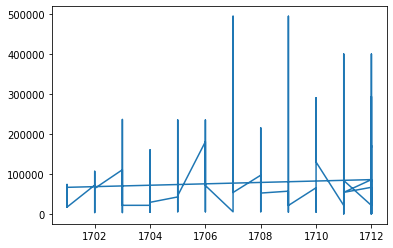

In [100]:
plt.plot(df_order_preprocess_dummy_17["주문년월"],(df_order_preprocess_dummy_17["상품구매금액"]),label="2017")
#plt.plot(df_order_preprocess_dummy_18["주문년월"],(df_order_preprocess_dummy_18["상품구매금액"]),label="2018")
plt.show()

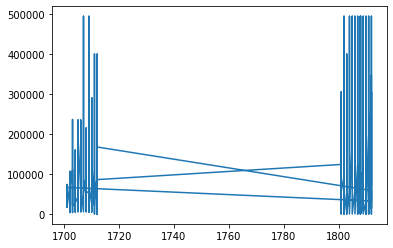

In [101]:
plt.plot(df_order_preprocess_dummy_18["주문년월"],(df_order_preprocess_dummy_18["상품구매금액"]),label="2018")
plt.show()

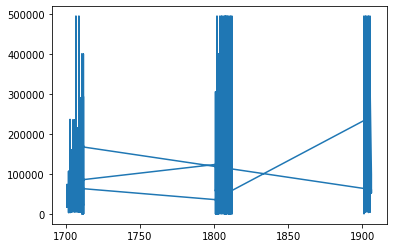

In [104]:
plt.plot(df_order_preprocess_dummy_19["주문년월"],(df_order_preprocess_dummy_19["상품구매금액"]),label="2018")
plt.show()

In [ ]:
f_currency_pivot=df_currency.pivot(index="APPL_DATE",columns="CURRENCY",values="STD_RATE")
df_currency_pivot.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

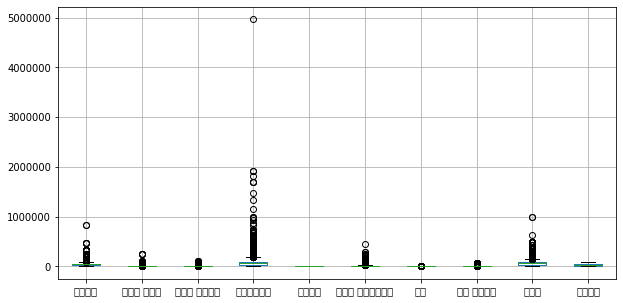

In [64]:
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname="malgunbd.ttf", size=24)
plt.figure(figsize=(10,5))
df_los.boxplot()

In [121]:
df_product_raw.sort_values(by=["매입가"],axis=0)

,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,판매가,품절여부,후기
101,102,다인컴즈,과세,0,0,스티커 원형 1탄 18종 40파이(소) 모음,2064,사용안함,NaN,051015010 : 스티커 제작 > 원형 스티커 > 원형 #1탄 18종\n0510...,15000,정상,0
486,487,패커스,과세,0,0,미소크린 위생롤팩 500매(17cm x 25cm) 20개 1박스,1651,사용함,NaN,046 : 주방용품/소모품\n046001 : 주방용품/소모품 > 비닐봉투\n026 ...,49000,정상,0
107,108,다인컴즈,과세,5,0,스티커 원형 1탄 #1 감사합니다 40(소) 55(중) 65(대),2058,사용안함,NaN,051015010 : 스티커 제작 > 원형 스티커 > 원형 #1탄 18종\n0510...,15000,정상,0
487,488,패커스,과세,0,0,미소크린 위생롤팩 500매(30cm x 39cm) 10개 1박스,1649,사용함,NaN,046 : 주방용품/소모품\n046001 : 주방용품/소모품 > 비닐봉투\n026 ...,45500,정상,0
106,107,다인컴즈,과세,2,0,스티커 원형 1탄 #2 리뷰작성 40(소) 55(중) 65(대),2059,사용안함,NaN,051015010 : 스티커 제작 > 원형 스티커 > 원형 #1탄 18종\n0510...,15000,정상,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,853,패커스,과세,0,220000,실링기계 푸디 수동 식품포장 몰드교체형 몰드1개포함,812,사용함,자체제작,019 : 실링기계\n042 : 실링제품\n042002 : 실링제품 > 실링기계,320000,정상,0
325,326,패커스,과세,0,220860,M&F 칠리페이스트 위드 소야빈 오일(똠얌) 3kg 6캔 1(박스 상품),1824,사용안함,NaN,050 : 식자재\n050007 : 식자재 > 태국/베트남 식자재\n05000700...,247400,정상,0
867,868,패커스,과세,0,226380,"원형 340mm 알루미늄 직화 냄비 특대 3,500ml 200개 1박스",600,사용함,자체제작,038 : 한식(분식) 용기\n038004 : 한식(분식) 용기 > 도시락용기/직화...,302500,정상,0
794,795,패커스,과세,0,258500,실링기계 201H 수동 식품포장 몰드교체형 몰드1개포함,1132,사용함,자체제작,042 : 실링제품\n042002 : 실링제품 > 실링기계,350000,정상,0


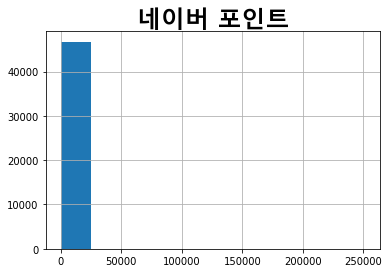

In [43]:
plt.title('네이버 포인트', fontproperties=fontprop)
df_los["네이버 포인트"].hist()

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

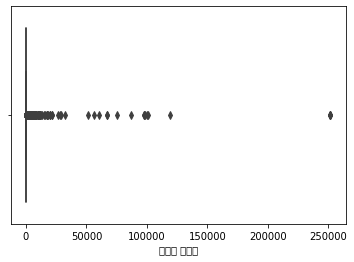

In [33]:
#2/10
sns.boxplot(df_los["네이버 포인트"])

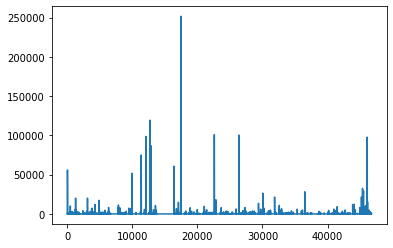

In [65]:
#2/8
plt.plot(df_los["네이버 포인트"])
plt.show()


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

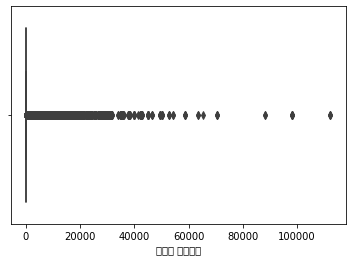

In [66]:
#3/10
sns.boxplot(df_los["사용한 적립금액"])

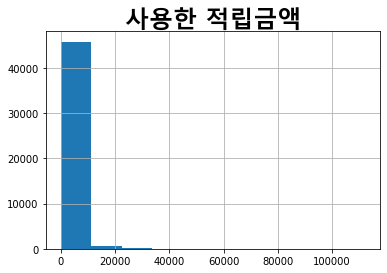

In [44]:
plt.title('사용한 적립금액', fontproperties=fontprop)
df_los["사용한 적립금액"].hist()

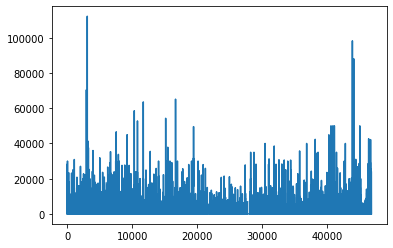

In [67]:
#3/10
plt.plot(df_los["사용한 적립금액"])
plt.show()

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

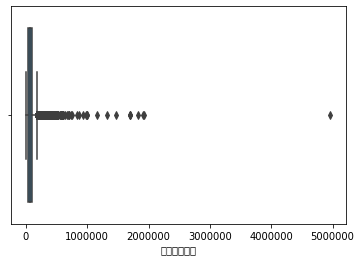

In [68]:
#4/10
sns.boxplot(df_los["상품구매금액"])

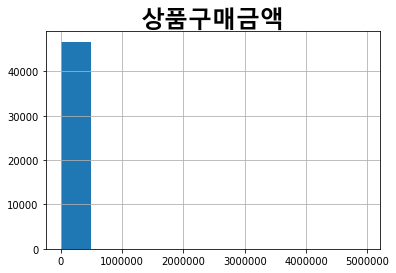

In [45]:
plt.title('상품구매금액', fontproperties=fontprop)
df_los["상품구매금액"].hist()

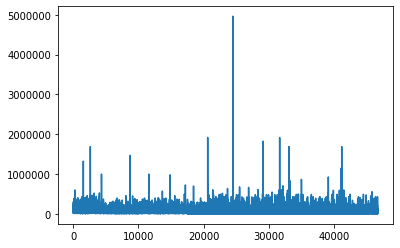

In [69]:
#4/10
plt.plot(df_los["상품구매금액"])
plt.show()


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeW

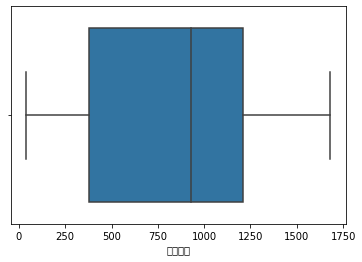

In [70]:
#5/10
sns.boxplot(df_los["상품번호"])

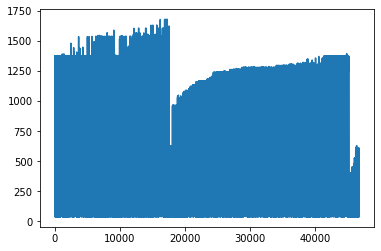

In [71]:
#5/10
plt.plot(df_los["상품번호"])
plt.show()


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

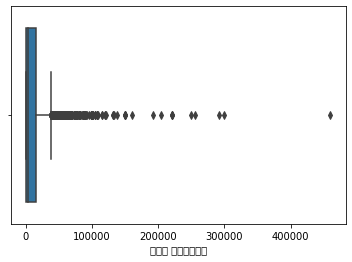

In [73]:
#6/10
sns.boxplot(df_los["상품별 추가할인금액"])

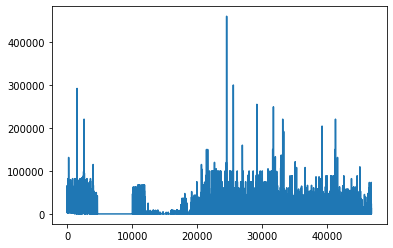

In [74]:
#6/10
plt.plot(df_los["상품별 추가할인금액"])
plt.show()


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0, flags=flags)


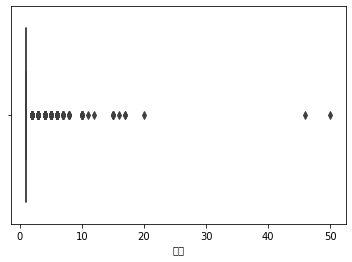

In [75]:
#7/10
sns.boxplot(df_los["수량"])

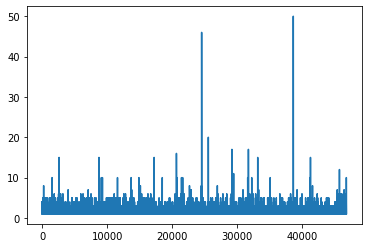

In [76]:
#7/10
plt.plot(df_los["수량"])
plt.show()


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

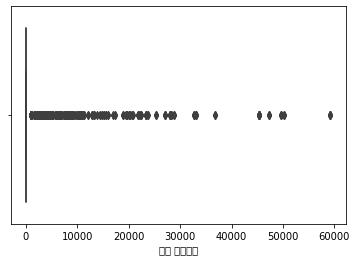

In [77]:
#8/10
sns.boxplot(df_los["쿠폰 할인금액"])

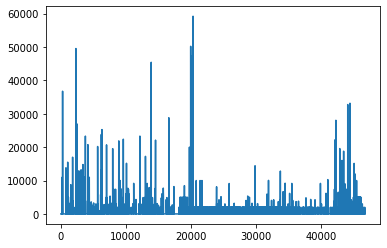

In [78]:
#8/10
plt.plot(df_los["쿠폰 할인금액"])
plt.show()


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWar

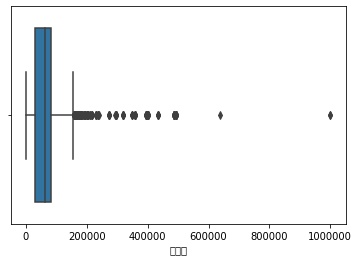

In [79]:
#9/10
sns.boxplot(df_los["판매가"])

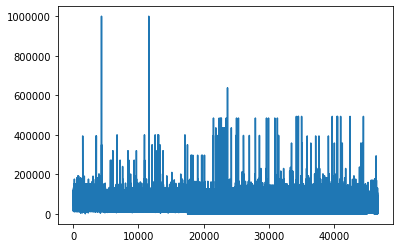

In [80]:
#9/10
plt.plot(df_los["판매가"])
plt.show()


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeW

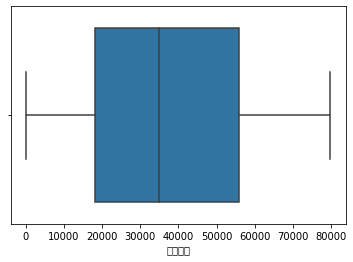

In [81]:
#10/10
sns.boxplot(df_los["품목번호"])

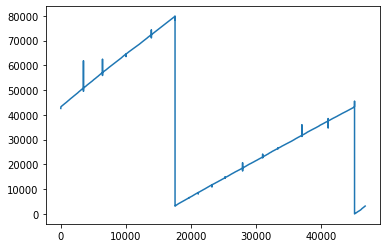

In [82]:
#10/10
plt.plot(df_los["품목번호"])
plt.show()


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

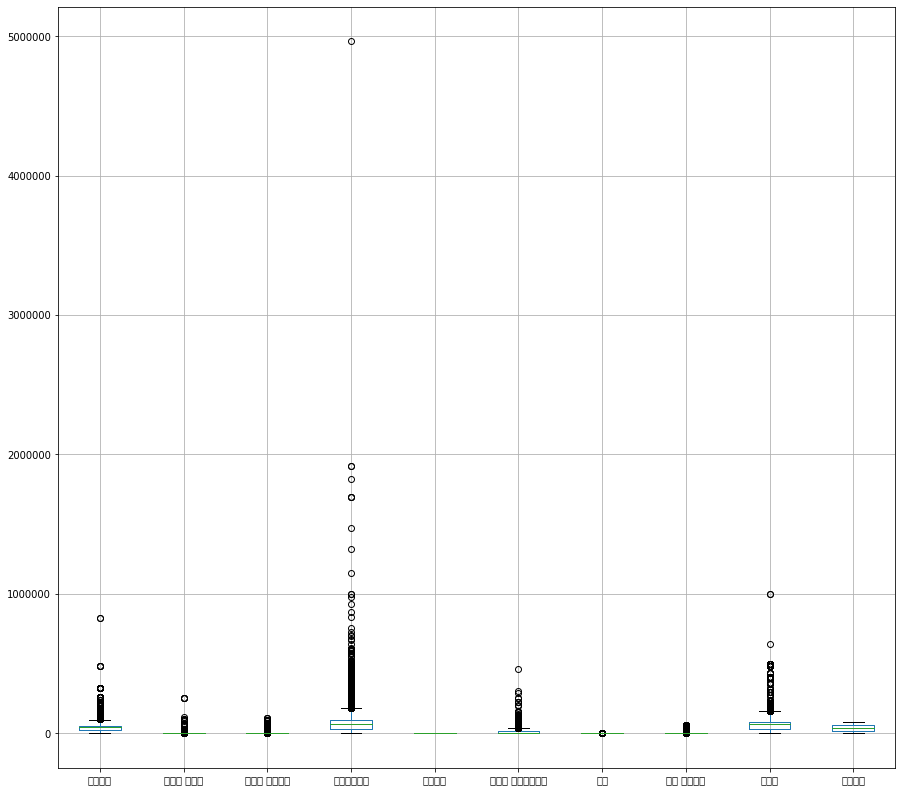

In [52]:
plt.figure(figsize=(15, 14))
df_los.boxplot()

In [ ]:
df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6758384110>,
      dtype=object)

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeW

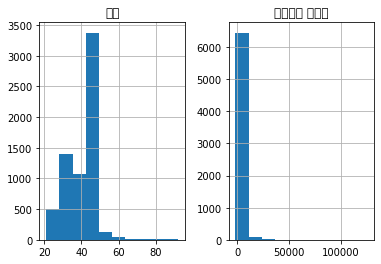

In [37]:
df_mms.hist()
"""
나이
사용가능 적립금

2개
"""

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)


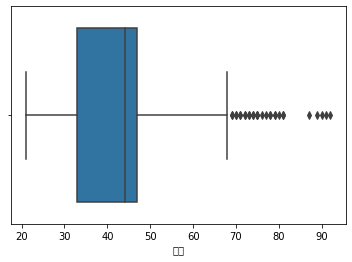

In [38]:
#mms 1/2
sns.boxplot(df_mms["나이"])

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

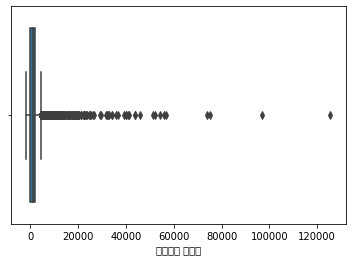

In [39]:
#mms 2/2
sns.boxplot(df_mms["사용가능 적립금"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6756d5e490>,
      dtype=object)

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45812 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWar

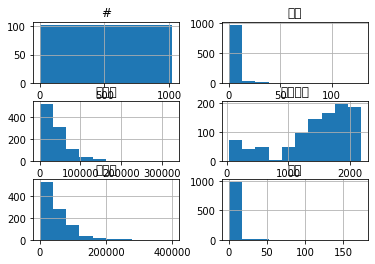

In [56]:
df_mps.hist()

In [6]:
df_mps.isnull().sum() 

#            0
공급사          0
과세/면세        0
담기           0
매입가          0
상품명(기본)      0
상품코드         0
재입고알림        0
제조사        486
카테고리         0
판매가          0
품절여부         0
후기           0
dtype: int64

In [28]:
df_mps.head(10)

,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,판매가,품절여부,후기
0,1,패커스,과세,0,55440,"실링용기 71호 백색 2,200ml 400개 1박스",2184,사용함,자체제작,018 : 실링용기\n018002 : 실링용기 > 2319(2318)시리즈\n042...,77480,정상,0
1,2,(주)니드코,과세,0,3080,"니드코]국산제품 정식쟁반,병원식판,분식점 돈까스쟁반 업소용 화이트 항균아트쟁반 5호",2181,사용안함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,4950,정상,0
2,3,(주)니드코,과세,10,1120,"니드코]QueenRose 장미 밥공기그릇 /중국집,주방,식당,가정용 깨지지 않는 단...",2180,사용함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,1800,정상,0
3,4,(주)니드코,과세,0,5600,니드코 터치미 종이컵디스펜서(자석형) 종이컵보관함,2179,사용안함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,9000,정상,0
4,5,(주)니드코,과세,0,42000,니드코 뉴카멜리아 사각수저함(수저통),2178,사용안함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,65000,정상,0
5,6,(주)니드코,과세,1,560,니드코 뉴카멜리아 파스텔 프리미엄요지통(이쑤시개포함),2177,사용안함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,900,정상,0
6,7,패커스,과세,0,150000,해농 김밥김 200g x 100매 20개 (박스상품),2176,사용안함,NaN,050 : 식자재\n050001 : 식자재 > 한식 식자재\n050001012 : ...,159600,정상,0
7,8,패커스,과세,0,21000,미소크린 점보롤 140cm x 16롤 (박스상품),2175,사용안함,NaN,046 : 주방용품/소모품\n046009 : 주방용품/소모품 > 일회용품\n0460...,23000,정상,0
8,9,패커스,과세,0,22500,미소크린 점보롤 180cm x 16롤 (박스상품),2174,사용안함,NaN,046 : 주방용품/소모품\n046009 : 주방용품/소모품 > 일회용품\n0460...,24800,정상,0
9,10,패커스,과세,0,11000,미소크린 위생식탁보 90cm x 130xm 300매 (박스상품),2173,사용안함,NaN,046 : 주방용품/소모품\n046009 : 주방용품/소모품 > 일회용품\n0460...,12100,정상,0


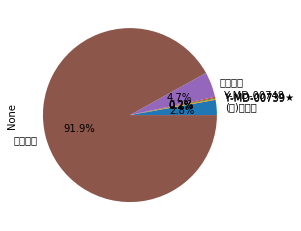

In [17]:
df_count=df_mps.groupby(["제조사"]).size()
df_count.plot.pie(y="manufacturer",autopct="%.1f%%")

In [15]:
print(df_mps["제조사"].unique())

['자체제작' '(주)니드코' nan '은진물산' 'Y-MD-00739' 'Y-MD-00739★' 'Y-MD-00748']


In [35]:
df_mps0 = df_mps

In [39]:
df_mps0 = df_mps0.fillna("제조사 없음")

In [40]:
df_mps["제조사 없음"]

#          0
공급사        0
과세/면세      0
담기         0
매입가        0
상품명(기본)    0
상품코드       0
재입고알림      0
제조사        0
카테고리       0
판매가        0
품절여부       0
후기         0
dtype: int64

In [32]:
df_mps0.isnull()

,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,판매가,품절여부,후기


In [12]:
p = re.compile(r"식자재")
m = p.findall(df_mps["카테고리"]) 

TypeError: expected string or bytes-like object

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

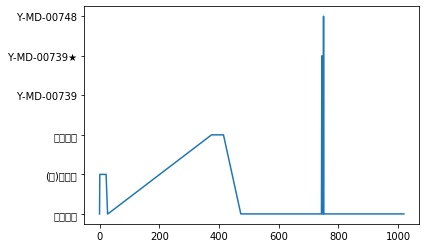

In [8]:
df_mpsm = df_mps.dropna()
plt.plot(df_mpsm["제조사"])
plt.show()


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

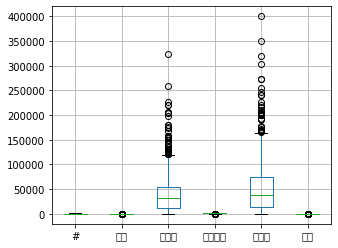

In [44]:
plt.figure(figsize=(5, 4))
df_mps.boxplot()
"""
담기
매입가
판매가
후기

4개
"""

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45812 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)


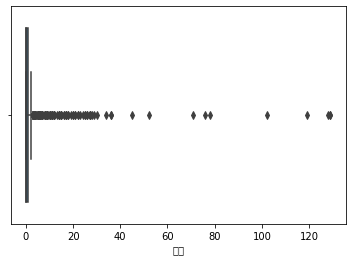

In [45]:
#1/4
sns.boxplot(df_mps["담기"])

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWar

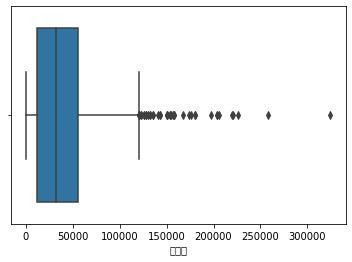

In [47]:
#2/4
sns.boxplot(df_mps["매입가"])

In [31]:
df_product_mid_cate_raw.rename(columns={"상품명(기본)":"상품명"}, inplace = True) 

In [22]:
df_order_client_quart_sort

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,...,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,주문년월
0,0,무통장입금,44550,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,전화주문 고객,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450,42602,1812
1,1,무통장입금,44000,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,일반,모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620,42930,1812
2,2,무통장입금,6820,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,비회원,모바일웹,20181230-0000100,2018-12-30 오후 3:15,unsinged_0,기타,0,13910,42998,1812
3,3,무통장입금,49500,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,일반,모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600,43063,1812
4,4,무통장입금,61600,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,사업자,모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710,43066,1812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46656,46656,카드,36300,교환안함,0,D-20171229-0000036-00,무료,2017-12-29 오후 4:32,2018-01-02 오전 5:31,0,...,일반,모바일웹,20171229-0000036,2017-12-29 오후 1:39,73987748@n,국민,0,52800,3170,1712
46657,46657,카드,36300,교환안함,0,D-20171229-0000043-00,무료,2018-01-03 오전 9:45,2018-01-07 오전 5:38,0,...,사업자,모바일웹,20171229-0000043,2017-12-29 오후 5:16,chuheesuk,비씨,0,56100,3172,1712
46658,46658,카드,22280,교환안함,300,D-20171230-0000022-01,무료,2018-01-02 오후 7:06,2018-01-11 오전 2:46,0,...,비회원,네이버 페이,20171230-0000022,2017-12-30 오후 6:56,unsinged_754,기타,0,36000,3177,1712
46659,46659,카드,55000,교환안함,320,D-20171231-0000017-01,무료,2018-01-03 오후 2:00,2018-01-06 오후 6:06,0,...,비회원,네이버 페이,20171231-0000017,2017-12-31 오전 10:00,unsinged_464,기타,0,73460,3178,1712


In [32]:
df_order_merge_qtr_bcate = pd.merge(df_order_client_quart_sort, df_product_mid_cate_raw,on = "상품명", how="inner")
df_order_merge_qtr_bcate

,Unnamed: 0_x,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,...,상품코드,재입고알림,제조사,카테고리,reg_카테고리,대분류,중분류,판매가_y,품절여부,후기
0,0,무통장입금,44550,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,1077,사용함,자체제작,038 : 한식(분식) 용기\n038001 : 한식(분식) 용기 > 탕/찜/죽/면용...,회접시 면 탕 탕용기 죽 찜 일식 양식 용기 중식 한식(분식) 볶음밥용기 면용기 죽...,용기,일식 양식 중식 한식(분식),57850,정상,80
1,20,무통장입금,44550,교환안함,0,D-20181231-0000373-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,1077,사용함,자체제작,038 : 한식(분식) 용기\n038001 : 한식(분식) 용기 > 탕/찜/죽/면용...,회접시 면 탕 탕용기 죽 찜 일식 양식 용기 중식 한식(분식) 볶음밥용기 면용기 죽...,용기,일식 양식 중식 한식(분식),57850,정상,80
2,39,카드,44550,교환안함,0,D-20190101-0000038-02,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,1077,사용함,자체제작,038 : 한식(분식) 용기\n038001 : 한식(분식) 용기 > 탕/찜/죽/면용...,회접시 면 탕 탕용기 죽 찜 일식 양식 용기 중식 한식(분식) 볶음밥용기 면용기 죽...,용기,일식 양식 중식 한식(분식),57850,정상,80
3,66,카드,44550,교환안함,0,D-20190101-0000202-00,무료,2019-01-03 오전 9:28,2019-01-07 오전 5:32,0,...,1077,사용함,자체제작,038 : 한식(분식) 용기\n038001 : 한식(분식) 용기 > 탕/찜/죽/면용...,회접시 면 탕 탕용기 죽 찜 일식 양식 용기 중식 한식(분식) 볶음밥용기 면용기 죽...,용기,일식 양식 중식 한식(분식),57850,정상,80
4,69,"적립금,무통장입금",44550,교환안함,0,D-20190102-0000025-00,무료,2019-01-03 오전 9:28,2019-01-07 오전 5:32,30000,...,1077,사용함,자체제작,038 : 한식(분식) 용기\n038001 : 한식(분식) 용기 > 탕/찜/죽/면용...,회접시 면 탕 탕용기 죽 찜 일식 양식 용기 중식 한식(분식) 볶음밥용기 면용기 죽...,용기,일식 양식 중식 한식(분식),57850,정상,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29466,36863,무통장입금,85140,교환안함,0,D-20181030-0000673-00,무료,2018-11-01 오후 4:01,2018-11-05 오전 5:32,0,...,1215,사용함,자체제작,038 : 한식(분식) 용기\n038003 : 한식(분식) 용기 > 떡/반찬용기\n...,반찬용기 떡 일식 양식 중식 용기 한식(분식),용기,일식 양식 중식 한식(분식),113830,정상,0
29467,41415,무통장입금,9800,교환안함,0,D-20181204-0000524-00,무료,2018-12-04 오후 8:41,2018-12-08 오전 5:32,0,...,1017,사용함,자체제작,046 : 주방용품/소모품\n046010 : 주방용품/소모품 > 주방잡화\n0460...,소모품 주방용품 주방잡화,주방용품,-,18600,정상,0
29468,42681,무통장입금,9800,교환안함,0,D-20181213-0000162-00,무료,2018-12-14 오전 9:05,2018-12-18 오전 5:32,0,...,1017,사용함,자체제작,046 : 주방용품/소모품\n046010 : 주방용품/소모품 > 주방잡화\n0460...,소모품 주방용품 주방잡화,주방용품,-,18600,정상,0
29469,45337,"쿠폰,무통장입금",4950,교환안함,0,D-20170608-0000014-01,무료,2017-06-09 오후 6:10,2017-06-15 오전 5:43,0,...,386,사용함,자체제작,046 : 주방용품/소모품\n046007 : 주방용품/소모품 > 주방용품\n0460...,소모품 주방용품 식기,주방용품,-,11500,정상,0


In [34]:
df_order_merge_qtr_bcate_1st =df_order_merge_qtr_bcate[(df_order_merge_qtr_bcate["주문년월"]==1801)|(df_order_merge_qtr_bcate["주문년월"]==1802)|(df_order_merge_qtr_bcate["주문년월"]==1803)|(df_order_merge_qtr_bcate["주문년월"]==1701)|(df_order_merge_qtr_bcate["주문년월"]==1702)|(df_order_merge_qtr_bcate["주문년월"]==1703)|(df_order_merge_qtr_bcate["주문년월"]==1901)|(df_order_merge_qtr_bcate["주문년월"]==1902)|(df_order_merge_qtr_bcate["주문년월"]==1903)]
df_order_merge_qtr_bcate_2nd =df_order_merge_qtr_bcate[(df_order_merge_qtr_bcate["주문년월"]==1804)|(df_order_merge_qtr_bcate["주문년월"]==1805)|(df_order_merge_qtr_bcate["주문년월"]==1806)|(df_order_merge_qtr_bcate["주문년월"]==1704)|(df_order_merge_qtr_bcate["주문년월"]==1705)|(df_order_merge_qtr_bcate["주문년월"]==1706)|(df_order_merge_qtr_bcate["주문년월"]==1904)|(df_order_merge_qtr_bcate["주문년월"]==1905)|(df_order_merge_qtr_bcate["주문년월"]==1906)]
df_order_merge_qtr_bcate_3rd =df_order_merge_qtr_bcate[(df_order_merge_qtr_bcate["주문년월"]==1807)|(df_order_merge_qtr_bcate["주문년월"]==1808)|(df_order_merge_qtr_bcate["주문년월"]==1809)|(df_order_merge_qtr_bcate["주문년월"]==1707)|(df_order_merge_qtr_bcate["주문년월"]==1708)|(df_order_merge_qtr_bcate["주문년월"]==1709)]
df_order_merge_qtr_bcate_4th =df_order_merge_qtr_bcate[(df_order_merge_qtr_bcate["주문년월"]==1810)|(df_order_merge_qtr_bcate["주문년월"]==1811)|(df_order_merge_qtr_bcate["주문년월"]==1812)|(df_order_merge_qtr_bcate["주문년월"]==1710)|(df_order_merge_qtr_bcate["주문년월"]==1711)|(df_order_merge_qtr_bcate["주문년월"]==1712)]

print(len(df_order_merge_qtr_bcate_1st))
print(len(df_order_merge_qtr_bcate_2nd))
print(len(df_order_merge_qtr_bcate_3rd))
print(len(df_order_merge_qtr_bcate_4th))

9623
9413
4182
6253


In [35]:
df_order_merge_qtr_bcate_1_bowl =df_order_merge_qtr_bcate_1st[df_order_merge_qtr_bcate_1st["대분류"]=="용기"]
df_order_merge_qtr_bcate_1_kitchen =df_order_merge_qtr_bcate_1st[df_order_merge_qtr_bcate_1st["대분류"]=="주방용품"]
df_order_merge_qtr_bcate_1_sealing =df_order_merge_qtr_bcate_1st[df_order_merge_qtr_bcate_1st["대분류"]=="실링제품"]
df_order_merge_qtr_bcate_1_normal =df_order_merge_qtr_bcate_1st[df_order_merge_qtr_bcate_1st["대분류"]=="-"]
df_order_merge_qtr_bcate_1_food =df_order_merge_qtr_bcate_1st[df_order_merge_qtr_bcate_1st["대분류"]=="식자재"]

df_order_merge_qtr_bcate_2_bowl =df_order_merge_qtr_bcate_2nd[df_order_merge_qtr_bcate_2nd["대분류"]=="용기"]
df_order_merge_qtr_bcate_2_kitchen =df_order_merge_qtr_bcate_2nd[df_order_merge_qtr_bcate_2nd["대분류"]=="주방용품"]
df_order_merge_qtr_bcate_2_sealing =df_order_merge_qtr_bcate_2nd[df_order_merge_qtr_bcate_2nd["대분류"]=="실링제품"]
df_order_merge_qtr_bcate_2_normal =df_order_merge_qtr_bcate_2nd[df_order_merge_qtr_bcate_2nd["대분류"]=="-"]
df_order_merge_qtr_bcate_2_food =df_order_merge_qtr_bcate_2nd[df_order_merge_qtr_bcate_2nd["대분류"]=="식자재"]

df_order_merge_qtr_bcate_3_bowl =df_order_merge_qtr_bcate_3rd[df_order_merge_qtr_bcate_3rd["대분류"]=="용기"]
df_order_merge_qtr_bcate_3_kitchen =df_order_merge_qtr_bcate_3rd[df_order_merge_qtr_bcate_3rd["대분류"]=="주방용품"]
df_order_merge_qtr_bcate_3_sealing =df_order_merge_qtr_bcate_3rd[df_order_merge_qtr_bcate_3rd["대분류"]=="실링제품"]
df_order_merge_qtr_bcate_3_normal =df_order_merge_qtr_bcate_3rd[df_order_merge_qtr_bcate_3rd["대분류"]=="-"]
df_order_merge_qtr_bcate_3_food =df_order_merge_qtr_bcate_3rd[df_order_merge_qtr_bcate_3rd["대분류"]=="식자재"]

df_order_merge_qtr_bcate_4_bowl =df_order_merge_qtr_bcate_4th[df_order_merge_qtr_bcate_4th["대분류"]=="용기"]
df_order_merge_qtr_bcate_4_kitchen =df_order_merge_qtr_bcate_4th[df_order_merge_qtr_bcate_4th["대분류"]=="주방용품"]
df_order_merge_qtr_bcate_4_sealing =df_order_merge_qtr_bcate_4th[df_order_merge_qtr_bcate_4th["대분류"]=="실링제품"]
df_order_merge_qtr_bcate_4_normal =df_order_merge_qtr_bcate_4th[df_order_merge_qtr_bcate_4th["대분류"]=="-"]
df_order_merge_qtr_bcate_4_food =df_order_merge_qtr_bcate_4th[df_order_merge_qtr_bcate_4th["대분류"]=="식자재"]



df_order_merge_qtr_bcate_1_kitchen
df_order_merge_qtr_bcate_1_sealing
df_order_merge_qtr_bcate_1_normal
df_order_merge_qtr_bcate_1_food

len(df_order_merge_qtr_bcate_1_bowl)
len(df_order_merge_qtr_bcate_1_normal)

16

In [53]:
plt.rcParams['figure.figsize'] = [12, 8]

# info. of groups

group_names = ['1st qtr', '2nd qtr', '3rd qtr','4th qtr']
group_sizes = [9623, 9413,  4182, 6253]

# info. of subgroups
subgroup_names = ['1_bowl', '1_cutlery', '1_sealing','1_normal', '1_food', '2_bowl', '2_cutlery', '2_실링제품', '2_식자재','2_-','3_용기', '3_주방용품', '3_실링제품', '3_식자재','3_-','4_용기', '4_주방용품', '4_실링제품', '4_식자재','4_-']
subgroup_sizes = [len(df_order_merge_qtr_bcate_1_bowl), len(df_order_merge_qtr_bcate_1_kitchen),len(df_order_merge_qtr_bcate_1_sealing),len(df_order_merge_qtr_bcate_1_normal),len(df_order_merge_qtr_bcate_1_food),\
                 len(df_order_merge_qtr_bcate_2_bowl), len(df_order_merge_qtr_bcate_2_kitchen),len(df_order_merge_qtr_bcate_2_sealing),len(df_order_merge_qtr_bcate_2_normal),len(df_order_merge_qtr_bcate_2_food),
                 len(df_order_merge_qtr_bcate_3_bowl), len(df_order_merge_qtr_bcate_3_kitchen),len(df_order_merge_qtr_bcate_3_sealing),len(df_order_merge_qtr_bcate_3_normal),len(df_order_merge_qtr_bcate_3_food),
                 len(df_order_merge_qtr_bcate_4_bowl), len(df_order_merge_qtr_bcate_4_kitchen),len(df_order_merge_qtr_bcate_4_sealing),len(df_order_merge_qtr_bcate_4_normal),len(df_order_merge_qtr_bcate_4_food)]
# colors
a, b, c, d = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]
# width
width_num = 0.4

In [71]:
 # info. of groups
plt.rcParams['figure.figsize'] = [5, 5]
group_names = ['1st qtr', '2nd qtr', '3rd qtr','4th qtr']
group_sizes = [9623, 9413,  4182, 6253]

# info. of subgroups
subgroup_names = ['1_bowl', '1_cutlery', '1_sealing','1_-', '1_food', '2_bowl', '2_cutlery', '2_sealing', '2_food','2_-','3_bowl', '3_cutlery', '3_sealing', '3_food','3_-','4_bowl', '4_cutlery', '4_selaing', '4_food','4_-']
subgroup_sizes = [len(df_order_merge_qtr_bcate_1_bowl), len(df_order_merge_qtr_bcate_1_kitchen),len(df_order_merge_qtr_bcate_1_sealing),len(df_order_merge_qtr_bcate_1_normal),len(df_order_merge_qtr_bcate_1_food),\
                 len(df_order_merge_qtr_bcate_2_bowl), len(df_order_merge_qtr_bcate_2_kitchen),len(df_order_merge_qtr_bcate_2_sealing),len(df_order_merge_qtr_bcate_2_normal),len(df_order_merge_qtr_bcate_2_food),
                 len(df_order_merge_qtr_bcate_3_bowl), len(df_order_merge_qtr_bcate_3_kitchen),len(df_order_merge_qtr_bcate_3_sealing),len(df_order_merge_qtr_bcate_3_normal),len(df_order_merge_qtr_bcate_3_food),
                 len(df_order_merge_qtr_bcate_4_bowl), len(df_order_merge_qtr_bcate_4_kitchen),len(df_order_merge_qtr_bcate_4_sealing),len(df_order_merge_qtr_bcate_4_normal),len(df_order_merge_qtr_bcate_4_food)]
# colors
a, b, c, d = [plt.cm.GnBu, plt.cm.GnBu, plt.cm.GnBu, plt.cm.GnBu]
# width
width_num = 0.4

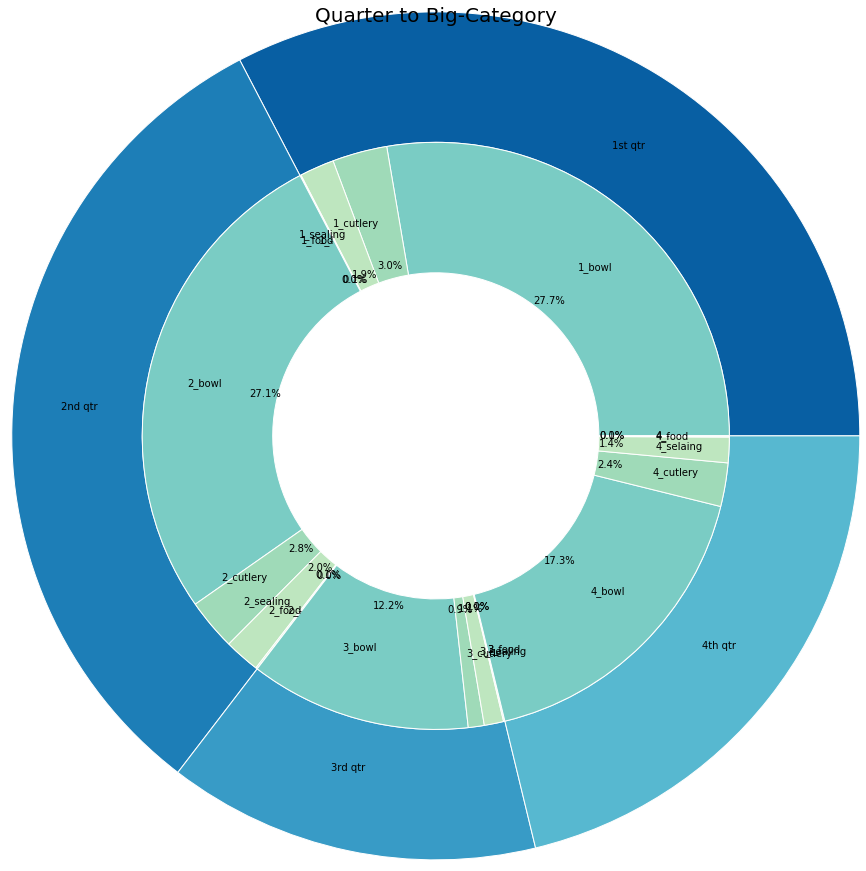

In [70]:
# Outside Ring
fig, ax = plt.subplots()
ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes,  radius=1.3, labels=group_names, labeldistance=0.8, colors=[a(0.9), b(0.8), c(0.7),d(0.6)])
plt.setp(pie_outside,width=width_num,edgecolor='white')

# Inside Ring
pie_inside, plt_labels, junk = ax.pie(subgroup_sizes, radius=(1.3 - width_num), labels=subgroup_names, labeldistance=0.75, autopct='%1.1f%%', colors=[a(0.5), a(0.4), a(0.3), a(0.2), a(0.1), b(0.5), b(0.4), b(0.3), b(0.2), b(0.1), c(0.5), c(0.4), c(0.3), c(0.2), c(0.1), d(0.5), d(0.4), d(0.3), d(0.2), d(0.1)])
plt.setp(pie_inside, width=width_num, edgecolor='white')
plt.title('Quarter to Big-Category', fontsize=20)
plt.show()

In [ ]:
len(df_order_merge_qtr_bcate_1_bowl), len(df_order_merge_qtr_bcate_1_kitchen),len(df_order_merge_qtr_bcate_1_sealing),len(df_order_merge_qtr_bcate_1_normal),len(df_order_merge_qtr_bcate_1_food),\
len(df_order_merge_qtr_bcate_2_bowl), len(df_order_merge_qtr_bcate_2_kitchen),len(df_order_merge_qtr_bcate_2_sealing),len(df_order_merge_qtr_bcate_2_normal),len(df_order_merge_qtr_bcate_2_food),
len(df_order_merge_qtr_bcate_3_bowl), len(df_order_merge_qtr_bcate_3_kitchen),len(df_order_merge_qtr_bcate_3_sealing),len(df_order_merge_qtr_bcate_3_normal),len(df_order_merge_qtr_bcate_3_food),
len(df_order_merge_qtr_bcate_4_bowl), len(df_order_merge_qtr_bcate_4_kitchen),len(df_order_merge_qtr_bcate_4_sealing),len(df_order_merge_qtr_bcate_4_normal),len(df_order_merge_qtr_bcate_4_food)]


===========bar1(bowl), bar2(cutlery), bar3(sealing)============


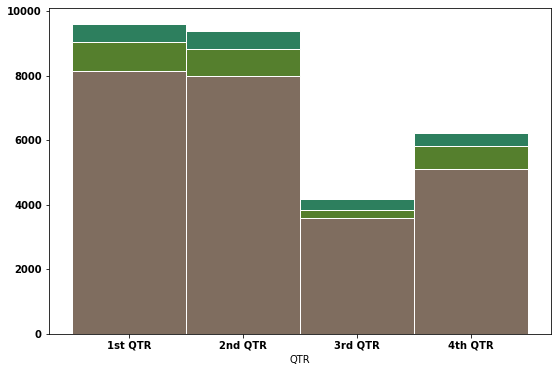

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [len(df_order_merge_qtr_bcate_1_bowl),len(df_order_merge_qtr_bcate_2_bowl),len(df_order_merge_qtr_bcate_3_bowl),len(df_order_merge_qtr_bcate_4_bowl)]
bars2 = [len(df_order_merge_qtr_bcate_1_kitchen),len(df_order_merge_qtr_bcate_2_kitchen),len(df_order_merge_qtr_bcate_3_kitchen),len(df_order_merge_qtr_bcate_4_kitchen)]
bars3 = [len(df_order_merge_qtr_bcate_1_sealing),len(df_order_merge_qtr_bcate_2_sealing),len(df_order_merge_qtr_bcate_3_sealing),len(df_order_merge_qtr_bcate_4_sealing)]
bars4 = [len(df_order_merge_qtr_bcate_1_normal),len(df_order_merge_qtr_bcate_2_normal),len(df_order_merge_qtr_bcate_3_normal),len(df_order_merge_qtr_bcate_4_normal)]
bars5 = [len(df_order_merge_qtr_bcate_1_food),len(df_order_merge_qtr_bcate_2_food),len(df_order_merge_qtr_bcate_3_food),len(df_order_merge_qtr_bcate_4_food)]
 
    
    
print("===========bar1(bowl), bar2(cutlery), bar3(sealing)============")    
# Heights of bars1 + bars2
temp1 = np.add(bars1, bars2).tolist()
temp2 = np.add(temp1, bars3).tolist()
bars = np.add(temp2, bars4).tolist()

# The position of the bars on the x-axis
r = [0,1,2,3]
 
# Names of group and bar width
names = ['1st QTR','2nd QTR','3rd QTR','4th QTR']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)

# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
plt.bar(r, bars3, bottom=temp1, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.bar(r, bars4, bottom=temp2, color='#bca79d', edgecolor='white', width=barWidth)

plt.bar(r, bars5, bottom=bars, color='#868d99', edgecolor='white', width=barWidth)
 

    
# Custom X axisplt.xticks(r, names, fontweight='bold')
plt.xticks(r, names, fontweight='bold')
plt.xlabel("QTR")

plt.show()

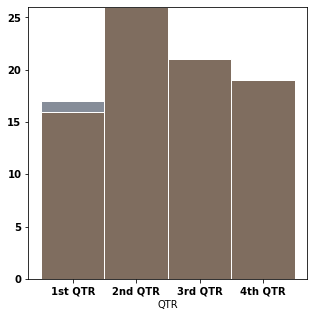

In [94]:
#bar4 & bar5
rc('font', weight='bold')
 
# Values of each group
bars1 = [len(df_order_merge_qtr_bcate_1_bowl),len(df_order_merge_qtr_bcate_2_bowl),len(df_order_merge_qtr_bcate_3_bowl),len(df_order_merge_qtr_bcate_4_bowl)]
bars2 = [len(df_order_merge_qtr_bcate_1_kitchen),len(df_order_merge_qtr_bcate_2_kitchen),len(df_order_merge_qtr_bcate_3_kitchen),len(df_order_merge_qtr_bcate_4_kitchen)]
bars3 = [len(df_order_merge_qtr_bcate_1_sealing),len(df_order_merge_qtr_bcate_2_sealing),len(df_order_merge_qtr_bcate_3_sealing),len(df_order_merge_qtr_bcate_4_sealing)]
bars4 = [len(df_order_merge_qtr_bcate_1_normal),len(df_order_merge_qtr_bcate_2_normal),len(df_order_merge_qtr_bcate_3_normal),len(df_order_merge_qtr_bcate_4_normal)]
bars5 = [len(df_order_merge_qtr_bcate_1_food),len(df_order_merge_qtr_bcate_2_food),len(df_order_merge_qtr_bcate_3_food),len(df_order_merge_qtr_bcate_4_food)]
 
# Heights of bars1 + bars2
temp1 = np.add(bars1, bars2).tolist()
temp2 = np.add(temp1, bars3).tolist()
bars = np.add(temp2, bars4).tolist()

# The position of the bars on the x-axis
r = [0,1,2,3]
 
# Names of group and bar width
names = ['1st QTR','2nd QTR','3rd QTR','4th QTR']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars4, color='#7f6d5f', edgecolor='white', width=barWidth)

# Create green bars (middle), on top of the firs ones
plt.bar(r, bars5, bottom=bars4, color='#868d99', edgecolor='white', width=barWidth)
 

    
# Custom X axisplt.xticks(r, names, fontweight='bold')
plt.xticks(r, names, fontweight='bold')
plt.xlabel("QTR")

plt.show()

In [95]:
len(df_order_merge_qtr_bcate_2_food)

0

In [93]:
df_order_monthly = pd.read_csv("/home/pirl/Downloads/7th_project1/1/order1/df_order_month.csv", engine="python", encoding="utf-8-sig")
df_order_monthly.head()

,주문년월,공급원가,네이버 포인트,사용한 적립금액,상품구매금액,상품별 추가할인금액,수량,쿠폰 할인금액,판매가,한식,...,양식,일식,분식,상품판매이익,zero,one,two,three,four,five
0,17년01월,110000,0,0,140200,0,2,5000,140200,2,...,2,2,2,-79800,6138,33,13,4,4,0
1,17년02월,851680,0,0,1087550,0,17,35000,1034250,14,...,13,9,14,-13391010,6138,33,13,4,4,0
2,17년03월,1623160,0,0,2328800,0,32,93000,2112100,23,...,19,16,23,-49612320,6138,33,13,4,4,0
3,17년04월,1411590,21500,0,1986750,0,29,45000,1847450,22,...,19,17,22,-38949360,6048,74,37,15,13,5
4,17년05월,2356090,1583,6458,3205950,144610,48,54000,3045850,39,...,33,32,39,-109886370,6048,74,37,15,13,5


In [116]:
df_order_merge_cust = pd.read_csv("/home/pirl/Downloads/7th_project1/1/order1/customer_merge.csv", usecols=["주문자ID","성별","AgeGroup","나이","상품구매금액"],engine="python", encoding="utf-8-sig")
df_order_merge_cust.head()

,주문자ID,상품구매금액,나이,성별,AgeGroup
0,100304734@n,103300,47,남자,45-49
1,1003409866@k,4308520,27,남자,25-29
2,100381931@n,71050,41,남자,40-44
3,1004498382@k,76400,47,남자,45-49
4,1004547839@k,360800,47,남자,45-49


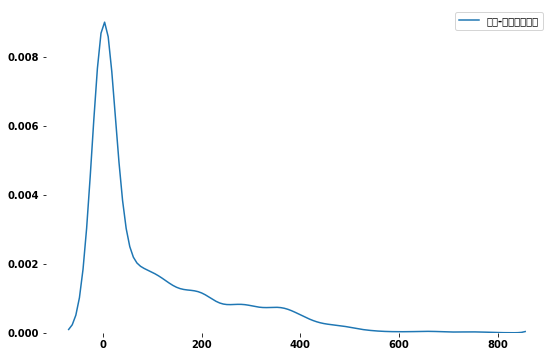

In [113]:
sns.kdeplot(df_order_merge_cust['가입-최종주문기간'])
plt.box(False)

In [114]:
df_order_merge_cust["AgeGroup"].unique()

array(['45-49', '25-29', '40-44', '30-34', '75-79', '35-39', '50-54',
       '20-24', '60-64', '70-74', '55-59', '85-89', '90-94', '65-69',
       '80-84'], dtype=object)

In [115]:
freq = ((df_gp.Age.value_counts(normalize = True).reset_index().sort_values(by = 'index').Age)*100).tolist()
number_gp = 7
# freq = the percentage for each age group, and there’re 7 age groups.
def ax_settings(ax, var_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(2)
    
    ax.text(0.02, 0.05, var_name, fontsize=17, fontweight="bold", transform = ax.transAxes) 
    return None
# Manipulate each axes object in the left. Try to tune some parameters and you'll know how each command works.
fig = plt.figure(figsize=(12,7))
gs = gridspec.GridSpec(nrows=number_gp,  ncols=2, figure=fig, width_ratios= [3, 1],height_ratios= [1]*number_gp, wspace=0.2, hspace=0.05)
ax = [None]*(number_gp + 1)
features = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94']
# Create a figure, partition the figure into 7*2 boxes, set up an ax array to store axes objects, and create a list of age group names.  
for i in range(number_gp):
    ax[i] = fig.add_subplot(gs[i, 0])
    
    ax_settings(ax[i], 'Age: ' + str(features[i]), -1000, 20000)    
    
    sns.kdeplot(data=df_gp[(df_gp.Gender == 'M') & (df_gp.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="blue",  bw=300, legend=False)
    sns.kdeplot(data=df_gp[(df_gp.Gender == 'F') & (df_gp.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="red",  bw=300, legend=False)
    
    if i < (number_gp - 1): 
        ax[i].set_xticks([])
# this 'for loop' is to create a bunch of axes objects, and link them to GridSpec boxes. Then, we manipulate them with sns.kdeplot() and ax_settings() we just defined.
ax[0].legend(['Male', 'Female'], facecolor='w')
# adding legends on the top axes object     
ax[number_gp] = fig.add_subplot(gs[:, 1])
ax[number_gp].spines['right'].set_visible(False)
ax[number_gp].spines['top'].set_visible(False)
ax[number_gp].barh(features, freq, color='#004c99', height=0.4)
ax[number_gp].set_xlim(0,100)
ax[number_gp].invert_yaxis()
ax[number_gp].text(1.09, -0.04, '(%)', fontsize=10, transform = ax[number_gp].transAxes)   
ax[number_gp].tick_params(axis='y', labelsize = 14)
# manipulate the bar plot on the right. Try to comment out some of the commands to see what they actually do to the bar plot.
plt.show()

NameError: name 'df_gp' is not defined

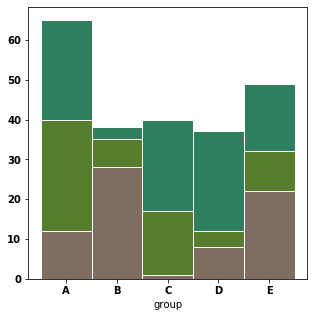

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 

plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Show graphic
plt.show()
